In [19]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  

In [35]:
data = pd.read_csv('titanic.csv')

In [36]:
data = data[['Pclass','Sex','Age','Survived','Parch','SibSp']]

In [37]:
data = data[['Pclass','Sex','Age','Survived','SibSp']]

In [38]:
data.head()

,Pclass,Sex,Age,Survived,SibSp
0,3,male,22.0,0,1
1,1,female,38.0,1,1
2,3,female,26.0,1,0
3,1,female,35.0,1,1
4,3,male,35.0,0,0


In [39]:
data['Sex'] = data['Sex'].map({'male':0,'female':1})

In [40]:
data = data.dropna()

In [41]:
# data["Age"].fillna(data["Age"].median(),inplace=True)

In [42]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=1)
eval_set = [(X_train,y_train),(X_test,y_test)]

In [55]:
model = XGBClassifier()
model.fit(X_train, y_train, eval_metric=['error','logloss'], eval_set=eval_set,verbose=True)

[0]	validation_0-error:0.14226	validation_0-logloss:0.56295	validation_1-error:0.16102	validation_1-logloss:0.56517
[1]	validation_0-error:0.14226	validation_0-logloss:0.49195	validation_1-error:0.16525	validation_1-logloss:0.49456
[2]	validation_0-error:0.13808	validation_0-logloss:0.44867	validation_1-error:0.16525	validation_1-logloss:0.45148
[3]	validation_0-error:0.15063	validation_0-logloss:0.41830	validation_1-error:0.16102	validation_1-logloss:0.42231
[4]	validation_0-error:0.14644	validation_0-logloss:0.39761	validation_1-error:0.15678	validation_1-logloss:0.40514
[5]	validation_0-error:0.14435	validation_0-logloss:0.38060	validation_1-error:0.16102	validation_1-logloss:0.39073
[6]	validation_0-error:0.14226	validation_0-logloss:0.36771	validation_1-error:0.15678	validation_1-logloss:0.37907
[7]	validation_0-error:0.13598	validation_0-logloss:0.35744	validation_1-error:0.15678	validation_1-logloss:0.37339
[8]	validation_0-error:0.13389	validation_0-logloss:0.35067	validation_1

[71]	validation_0-error:0.10042	validation_0-logloss:0.25319	validation_1-error:0.17373	validation_1-logloss:0.40851
[72]	validation_0-error:0.09833	validation_0-logloss:0.25274	validation_1-error:0.17373	validation_1-logloss:0.40748
[73]	validation_0-error:0.10042	validation_0-logloss:0.25235	validation_1-error:0.17373	validation_1-logloss:0.40957
[74]	validation_0-error:0.10042	validation_0-logloss:0.25214	validation_1-error:0.17373	validation_1-logloss:0.40946
[75]	validation_0-error:0.09833	validation_0-logloss:0.25190	validation_1-error:0.17373	validation_1-logloss:0.40885
[76]	validation_0-error:0.10251	validation_0-logloss:0.25169	validation_1-error:0.17797	validation_1-logloss:0.40989
[77]	validation_0-error:0.10042	validation_0-logloss:0.25150	validation_1-error:0.17797	validation_1-logloss:0.40984
[78]	validation_0-error:0.10042	validation_0-logloss:0.25132	validation_1-error:0.17797	validation_1-logloss:0.40934
[79]	validation_0-error:0.09833	validation_0-logloss:0.25090	val

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [57]:
result = model.evals_result()


In [47]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [48]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy*100.0))

Accuracy: 87.15%


In [13]:
# import pickle
# pickle.dump(model,open("myModel.dat","wb"))

In [14]:
# loaded_model = pickle.load(open("myModel.dat","rb"))

In [15]:
# y_pred = loaded_model.predict(X_test)
# predictions = [round(value) for value in y_pred]

In [16]:
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy*100.0))

Accuracy: 84.36%


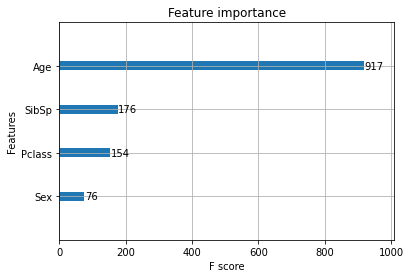

In [17]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()